In [6]:
import cv2
import numpy as np 
import time
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab



img_l = cv2.imread('left_5.png',1)
img_r = cv2.imread('right_5.png',1)
image_left = cv2.imread('right_5.png',1)
'''img_l = cv2.pyrDown(img_l)
img_r = cv2.pyrDown(img_r)

img_l = cv2.pyrDown(img_l)
img_r = cv2.pyrDown(img_r)'''

img_l = cv2.cvtColor(img_l, cv2.COLOR_BGR2RGB)
img_r = cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB)

rows,cols = img_l.shape[:2]
color = (0,255,0)


output_file = 'output_1.ply'


#img_l_u8 = np.uint8(img_l)
#img_r_u8 = np.uint8(img_r)
#img_l_edges = cv2.Canny(img_l_u8,100,200)
# img_r = cv2.Canny(img_r_u8,100,200)



camera_matrix_1 = np.matrix([[6.431071007716022e+02,0,294.6248],[0,1.177128650603916e+03,5.146612567771655e+02],[0,0,1]])#30.0783

camera_matrix_2 = (1.0e+03)*np.matrix([[0.6537,0,0.3020],[0,1.1825,0.5609],[0,0,0.0010]])#46.5610

dist_coeffs_1 = np.matrix([-0.1702,    0.4512,0,0,0])
dist_coeffs_2 = np.matrix([-0.1430,    0.1704,  0,0 ,0])

r = np.matrix([[0.9997,0.0198,0.0149],[-0.0203,0.9992,0.0354],[-0.0142,-0.0357,0.9993]])
t = np.array([-88.0120,-15.4548,52.2919])


( r_1,r_2,p_1,p_2,q,roi_1,roi_2  ) = cv2.stereoRectify(camera_matrix_1,dist_coeffs_1,camera_matrix_2,dist_coeffs_2,(512,512),r,t,flags=0)

print q

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00  -1.22436777e+03]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00  -5.11606528e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.15817706e+03]
 [  0.00000000e+00   0.00000000e+00   9.65861031e-03   8.34685184e-01]]


In [7]:
def create_output(vertices, colors, filename):
    colors = colors.reshape(-1, 3)
    vertices = vertices.reshape(-1,3)
    vertices = np.hstack([vertices, colors])

    ply_header = '''ply
        format ascii 1.0
        element vertex %(vert_num)d
        property float x
        property float y
        property float z
        property uchar red
        property uchar green
        property uchar blue
        end_header
    '''

    with open(filename, 'w') as f:
        f.write(ply_header % dict(vert_num=len(vertices)))
#         np.savetxt(f, vertices, '%0.5f %0.5f %0.5f %0.5d %0.5d %0.5d')

float32
False
False
204.8

Creating the output file ...



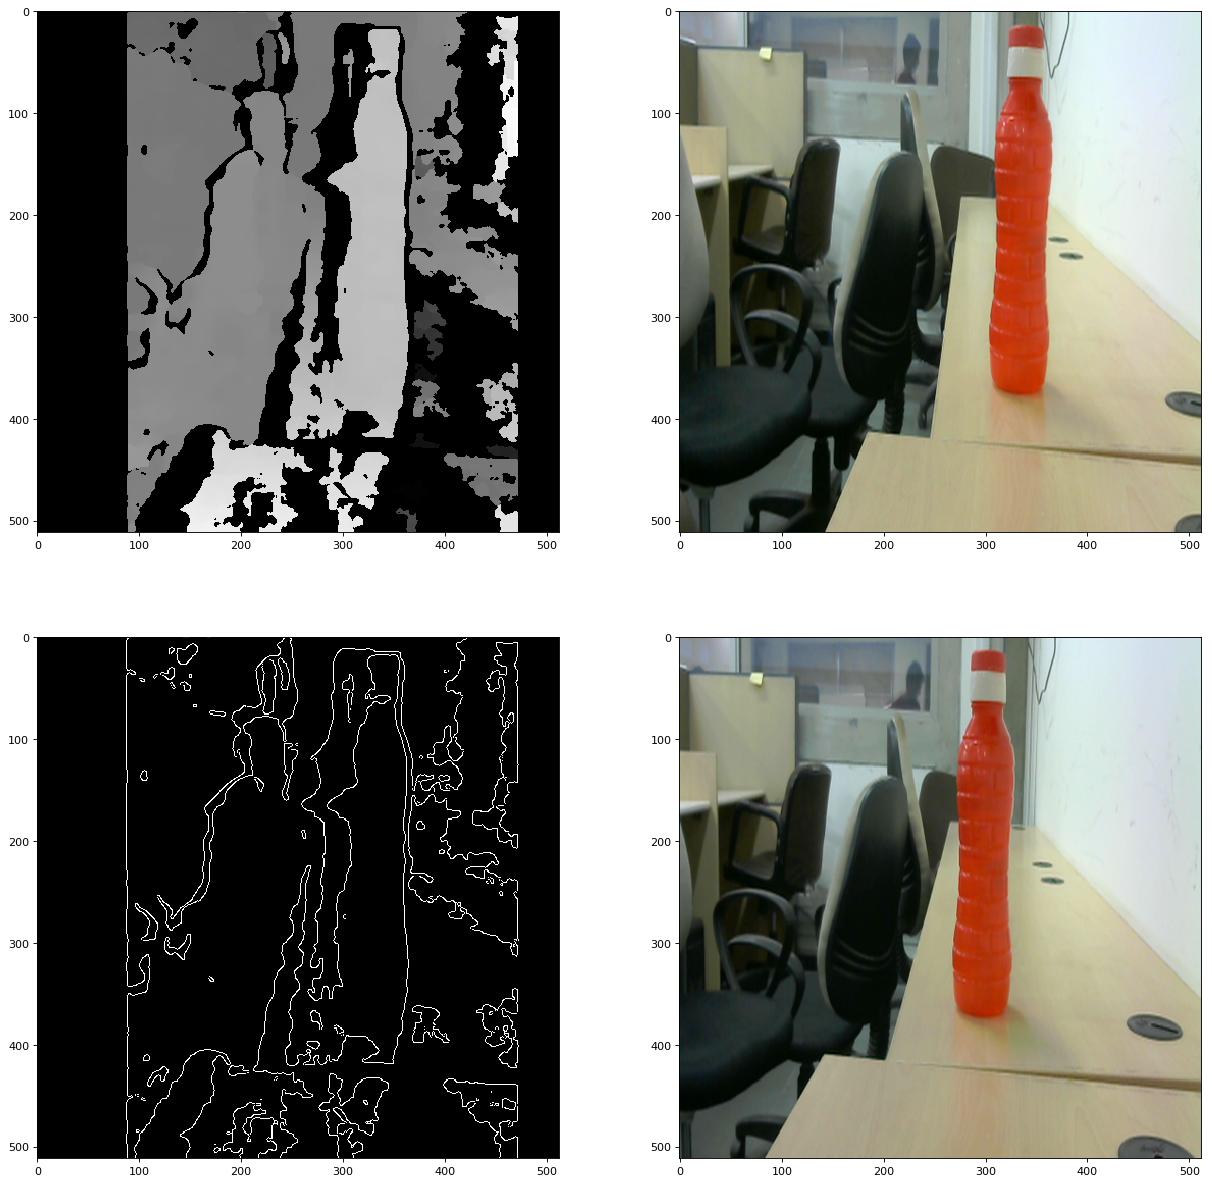

In [8]:
#####################stereo matching ##############################
# stereo = cv2.createStereoBM(numDisparities=16, blockSize=15)
window_size = 11
min_disp = -40
num_disp = 8*16
uniquenessRatio = 1
speckleWindowSize = 200
speckleRange = 2
disp12MaxDiff = 10
P1 = 10*3*window_size**2
P2 = 32*3*window_size**2	

def nothing(x):
    pass


cv2.namedWindow('controls',cv2.WINDOW_AUTOSIZE)

switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'controls',1,1,nothing)

# create trackbars for stereo parameters
cv2.createTrackbar('window_size','controls',11,60,nothing)
cv2.createTrackbar('min_disp','controls',64,300,nothing)
cv2.createTrackbar('num_disp','controls',12,30,nothing)
cv2.createTrackbar('uniquenessRatio','controls',1,100,nothing)
cv2.createTrackbar('speckleWindowSize','controls',50,100,nothing)
cv2.createTrackbar('speckleRange','controls',2,300,nothing)
cv2.createTrackbar('disp12MaxDiff','controls',10,50,nothing)
# cv2.createTrackbar('P1','controls',P1,30000,nothing)
# cv2.createTrackbar('P2','controls',P2,100000,nothing)

stereo = cv2.StereoSGBM_create(minDisparity = min_disp, numDisparities = num_disp,blockSize = window_size,uniquenessRatio = uniquenessRatio,speckleWindowSize = speckleWindowSize,speckleRange=speckleRange,disp12MaxDiff = disp12MaxDiff,P1 = P1,P2 = P2)
disparity = stereo.compute(img_l, img_r).astype(np.float32)/16.0


print disparity.dtype

rows,cols = disparity.shape
point_cloud = np.array((rows,cols,3),dtype = 'float')

mat = np.matrix([[1,0,0,-0.5*cols],[0,-1,0,0.5*rows],[0,0,0,-0.8*cols],[0,0,1,0]])

point_cloud_1 = cv2.reprojectImageTo3D(disparity,mat)#,ddepth=cv2.CV_32F)

#Image3D = cv2.reprojectImageTo3D(disparity, q, ddepth=cv2.CV_32F)
# Image3D_normalize = cv2.normalize(Image3D, alpha=0, beta=255, norm_type=cv2.NORM_L1, dtype=cv2.CV_8UC3)
# retVal = Image(Image3D_normalize, cv2image=True)
# print retVal
# print Image3D

# cv2.imwrite('point_cloud.ply',Image3D)

colors = cv2.cvtColor(image_left, cv2.COLOR_BGR2RGB)
mask_map = disparity > disparity.min()
output_points_1 = point_cloud_1[mask_map]


# mask_1 = np.isnan(point_cloud_1)

# mask_final = np.multiply( mask_map + mask_1)
# output_colors = colors[mask_map]

# output_colors = colors[mask_final]

print np.isnan(output_points_1).any()

print np.isinf(output_points_1).any()

print point_cloud_1.max()
# output_colors_1 = output_colors[np.invert(mask_2)]

print ("\nCreating the output file ...\n")
# create_output(output_points_1, output_colors, output_file)

# img_l_u8 = np.uint8(img_l)
disparity_u8 = np.uint8(disparity)

# edges_l = cv2.Canny(img_l_u8,100,200)
edges_disparity = cv2.Canny(disparity_u8,100,200)

cv2.imwrite('disparity.png',disparity)



fig = plt.figure(num=None, figsize=(19, 19), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(disparity,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_l,cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(edges_disparity,cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_r,cmap='gray')

plt.show()  


# cv2.imshow('disparity',disparity)
# cv2.imshow('original',img_l)
# cv2.waitKey(0)
